In [1]:
import cv2
import imutils

from src import config, image_utils, objects_detector
from src.aruco_marker import ArucoMarker
from src.route_generator import RouteGenerator

## Load image

In [2]:
img = cv2.imread('./../datasets/images/test/34.jpeg')
img = imutils.resize(img, width=1216)

## Load Aruco markers

In [3]:
marker = ArucoMarker(config.MARKER_ARUCO_DICT, img, config.MARKER_PERIMETER_IN_CM)

In [4]:
print("ArUco Perimeter: {}".format(marker.get_perimeter()))
print("Pixels per centimeter: {}".format(marker.get_pixels_per_centimeter()))

print("Width in px: {}".format(marker.get_width()))
print("Width in cm: {}".format(marker.get_width_in_cm()))
print("Height in px: {}".format(marker.get_height()))
print("Height in cm: {}".format(marker.get_height_in_cm()))

ArUco Perimeter: 149.73137283325195
Pixels per centimeter: 5.347549029758999
Width in px: 37.33630940518894
Width in cm: 6.981948028416974
Height in px: 37.05401462729781
Height in cm: 6.929158465138514


## Detect objects

In [5]:
detected_objects = objects_detector.detect(img)


0: 1216x928 82 holds, 1987.1ms
Speed: 10.4ms preprocess, 1987.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1216, 928)


# Draw bounding boxes

In [6]:
img_preview = image_utils.draw_bboxes(
    img,
    detected_objects,
    config.BBOX_COLOR,
    config.BBOX_CENTER_COLOR,
    config.LINE_WIDTH,
    override=False
)

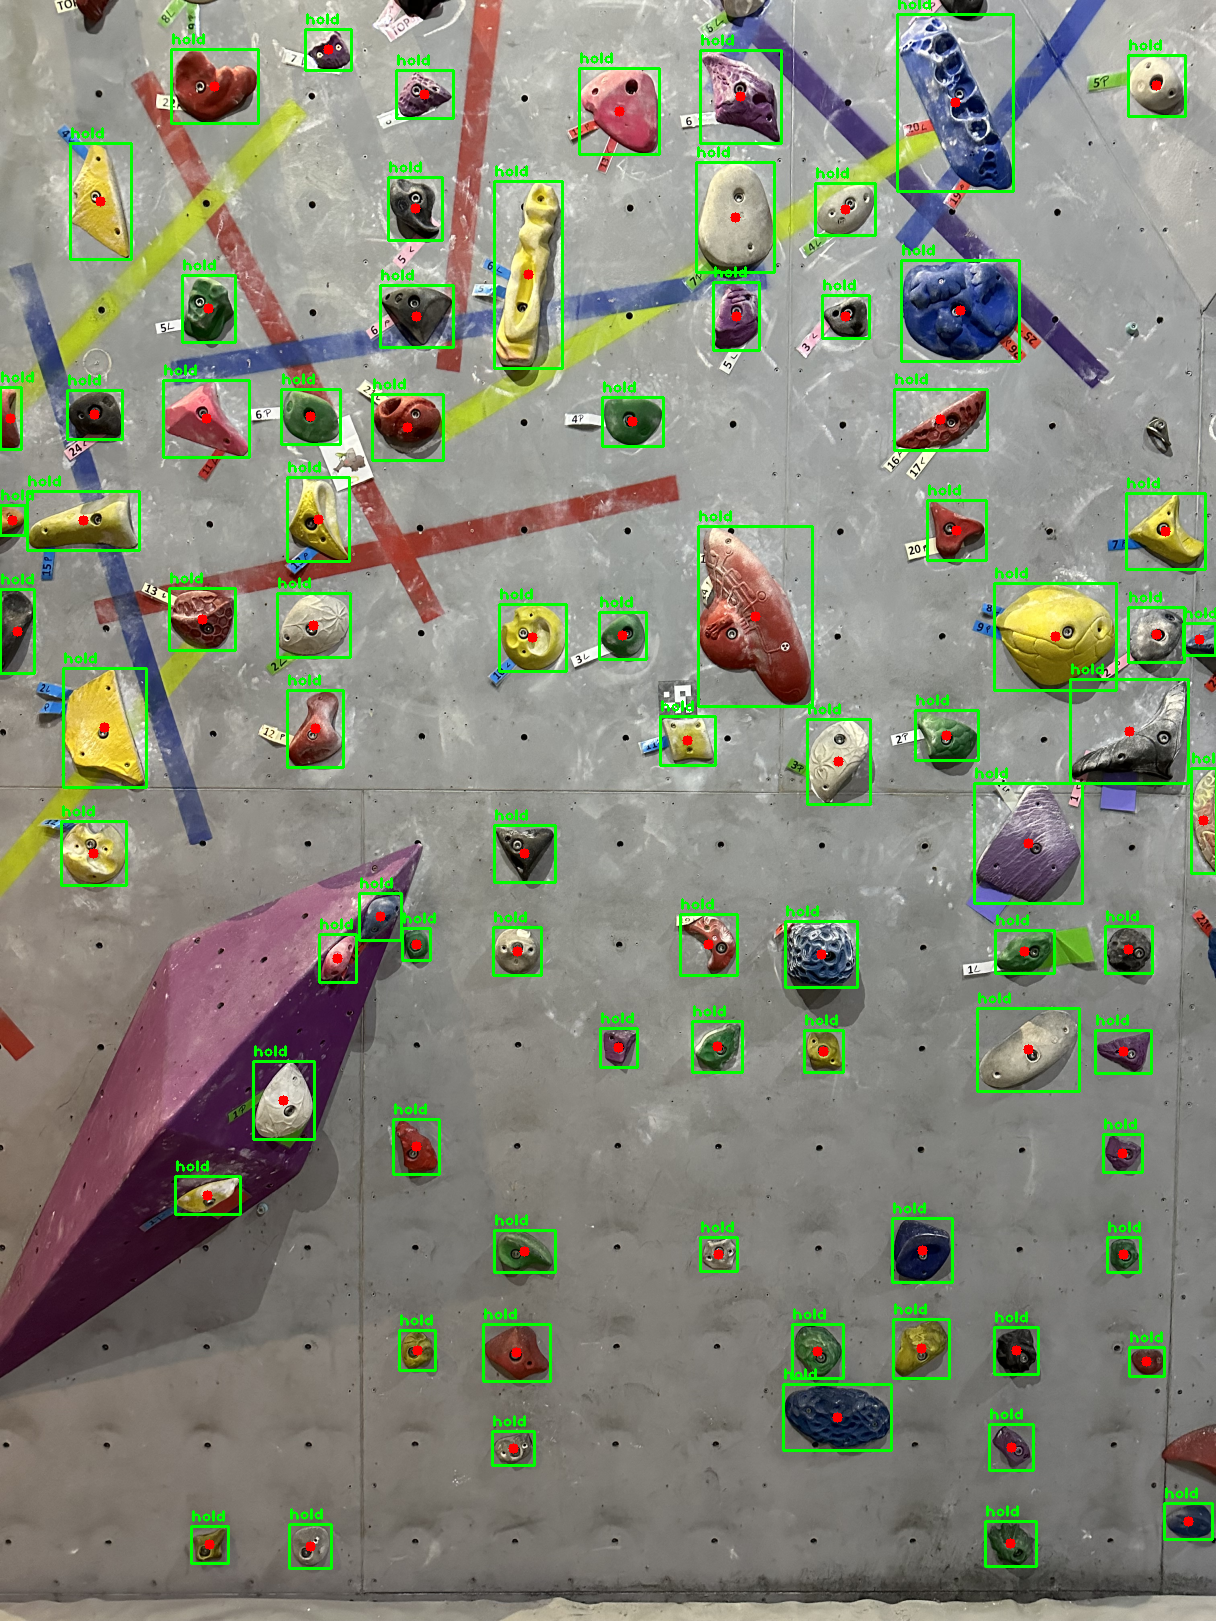

In [7]:
image_utils.display_image(img_preview)

# Generate route

In [8]:
route_generator = RouteGenerator(
    img_width=img.shape[1], 
    img_height=img.shape[0], 
    marker=marker, 
    detected_objects=detected_objects
)

In [9]:
steps = route_generator.generate_route(
    climber_height_in_cm=config.CLIMBER_HEIGHT_IN_CM,
    starting_steps_max_distance_from_ground_in_cm=40
)

In [10]:
steps

# Draw whole route

In [11]:
for step in steps:
    img = image_utils.draw_climber(
        img=img,
        climber=step,
        draw_labels=False,
        draw_centers=False,
    )

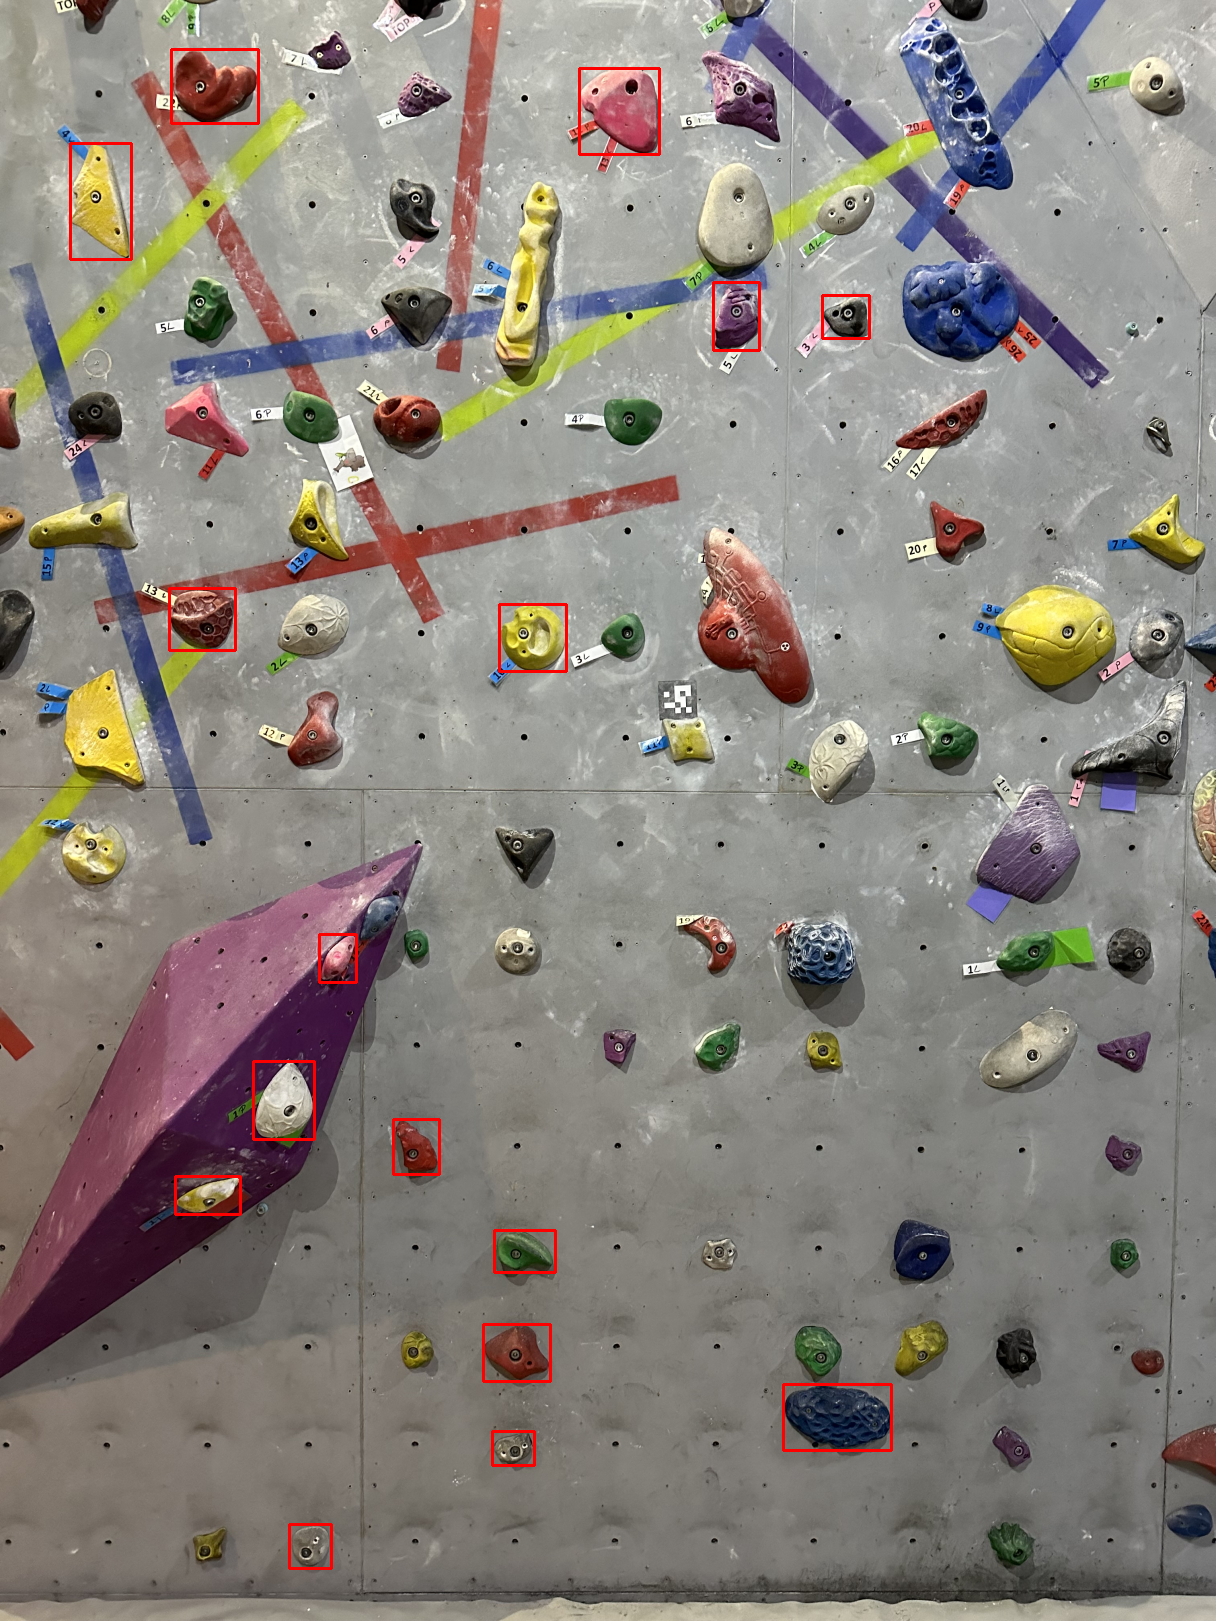

In [12]:
image_utils.display_image(img)